In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
df = pd.read_excel("data.xlsx")

df.head()

,avg_cost,avg_cpu_pct,avg_mem_mb,avg_conn_cnt
0,573.93,59.4,4860,905
1,543.47,60.5,4120,818
2,491.54,61.6,3535,750
3,698.42,62.7,4810,915
4,725.24,64.9,4770,921


In [3]:
df.shape

(24, 4)

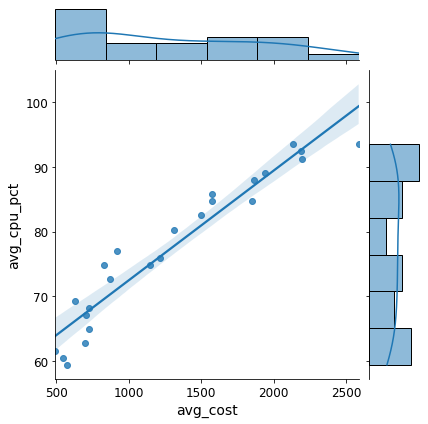

In [4]:
sns.jointplot(x=df['avg_cost'], y=df['avg_cpu_pct'], \
              data=df, kind='reg')

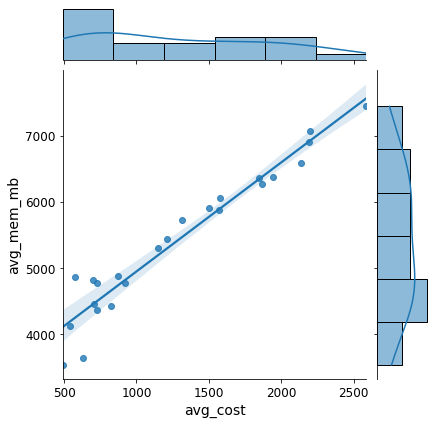

In [5]:
sns.jointplot(x=df['avg_cost'], y=df['avg_mem_mb'], \
              data=df, kind='reg')

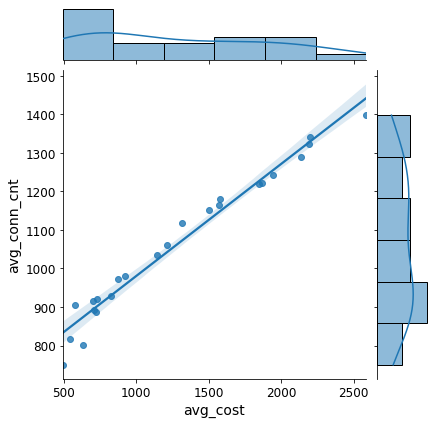

In [6]:
sns.jointplot(x=df['avg_cost'], y=df['avg_conn_cnt'], \
              data=df, kind='reg')

In [7]:
X = df[['avg_cpu_pct','avg_mem_mb','avg_conn_cnt']] 
Y = df['avg_cost']
 
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, \
                        test_size = 0.2, random_state = 42)

In [8]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [9]:
y_prediction =  LR.predict(x_test)
y_prediction

array([1010.49170495, 1650.73084113,  671.21864105, 1809.66263559,
       1181.46214231])

In [10]:
score=r2_score(y_test,y_prediction)
print("r2 score is ", score)

print('Root Mean Squared Error is =',np.sqrt(mean_squared_error(y_test,\
                                            y_prediction)))

r2 score is  0.9639947469678177
Root Mean Squared Error is = 88.1683066273819


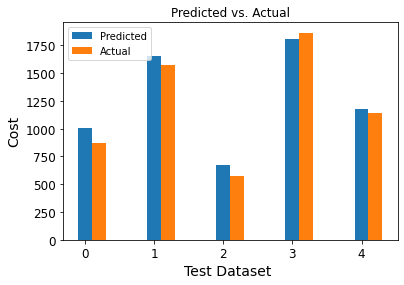

In [11]:
indices = np.arange(len(y_prediction))
width = 0.20
# Plotting
plt.bar(indices, y_prediction, width=width)
# Offsetting by width to shift the bars to the right
plt.bar(indices + width, y_test, width=width)
plt.xticks(ticks=indices)
plt.ylabel("Cost")
plt.xlabel("Test Dataset ")
plt.title("Predicted vs. Actual")
valuesType=['Predicted','Actual']
plt.legend(valuesType,loc=2)
plt.show()

In [13]:
from sklearn.metrics import mean_squared_log_error
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)*100)  
    mae = np.mean(np.abs(forecast - actual))       
    rmse = np.mean((forecast - actual)**2)**.5  
    rmsle = np.sqrt(mean_squared_log_error(actual, forecast))
    return({'MAPE : ':mape, 'MAE : ': mae, 
             'RMSE : ':rmse, 'RMSLE : ':rmsle
           })


forecast_accuracy(y_prediction, y_test)

{'MAPE : ': 8.755393632946262,
 'MAE : ': 80.8241387679798,
 'RMSE : ': 88.1683066273819,
 'RMSLE : ': 0.09998192560338945}